# WeatherPy Analysis Overview
----
1. The findings of these analysis showed that there is a higher temperature for cities that found near to the equator (Latitude 0), going further towards the North we have a dramatic decrease in temperature while moving towards South we face a steady decrease in temperature. The regression analysis and plot also showed that there is a strong negative correlation between temperature, and latitude in the northern hemisphere while, this correlation in the south Hemisphere is mostly negative or very week to conclude.

2. The findings from the data, plots, and the regression line in the case of testing if there is a relation between humidity and cloudiness of cities nearer or farther to the equator (latitude 0) doesn't show any significant results. The correlation between humidity and latitude for both northern and southern hemisphere cities is significantly low. The cloudiness and latitude display a negative result. Therefore, We can infer that humidity can be fairly distributed in both northern and southern hemisphere cities regardless of their distance from the equator.

3. The finding from the analysis of the relationship between wind speed (mph), and latitude display that when the cities closer to the equater (latitude 0) they have lower wind speed. The regression analysis also showes, there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=196ef66f85dc97f9405d136d81d3f9eb&units=imperial&q='

In [4]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=196ef66f85dc97f9405d136d81d3f9eb&units=imperial&q=


In [5]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []
citys = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
#     count = count + 1
#     # To avoid api call rate limits, get city weather data for 50 cities,
#     # then sleep for 5 seconds, and then continue with next 50 cities and so on...
#     if count == 51:
    count = 1
    set = set + 1
#         time.sleep(5)
#         print(f"Processing Record {count} of Set {set} | {city}")
    try:
        print(f"Processing Record {count} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        citys.append(city)
    except KeyError:
        #print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
        citys.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 2 | kodiak
Processing Record 1 of Set 3 | hermanus
Processing Record 1 of Set 4 | chagda
Processing Record 1 of Set 5 | longyearbyen
Processing Record 1 of Set 6 | takoradi
Processing Record 1 of Set 7 | tura
Processing Record 1 of Set 8 | chuy
Processing Record 1 of Set 9 | vostok
Processing Record 1 of Set 10 | punta arenas
Processing Record 1 of Set 11 | yellowknife
Processing Record 1 of Set 12 | busselton
Processing Record 1 of Set 13 | atuona
Processing Record 1 of Set 14 | kamenka
Processing Record 1 of Set 15 | castro
Processing Record 1 of Set 16 | kapaa
Processing Record 1 of Set 17 | hasaki
Processing Record 1 of Set 18 | hobart
Processing Record 1 of Set 19 | mersing
Processing Record 1 of Set 20 | ushuaia
Processing Record 1 of Set 21 | coahuayana
Processing Record 1 of Set 22 | canutama
Processing Record 1 of Set 23 | bluff
Processing Record 1 of Set 24 | new norfolk
Processin

Processing Record 1 of Set 196 | tiksi
Processing Record 1 of Set 197 | te anau
Processing Record 1 of Set 198 | chokurdakh
Processing Record 1 of Set 199 | katangli
Processing Record 1 of Set 200 | sardinata
Processing Record 1 of Set 201 | san jeronimo
Processing Record 1 of Set 202 | damietta
Processing Record 1 of Set 203 | woodburn
Processing Record 1 of Set 204 | cururupu
Processing Record 1 of Set 205 | leningradskiy
Processing Record 1 of Set 206 | westport
Processing Record 1 of Set 207 | mgandu
Processing Record 1 of Set 208 | urengoy
Processing Record 1 of Set 209 | taoudenni
Processing Record 1 of Set 210 | lashio
Processing Record 1 of Set 211 | tarudant
Processing Record 1 of Set 212 | hithadhoo
Processing Record 1 of Set 213 | berlevag
Processing Record 1 of Set 214 | san quintin
Processing Record 1 of Set 215 | quelimane
Processing Record 1 of Set 216 | grand centre
Processing Record 1 of Set 217 | tsihombe
Processing Record 1 of Set 218 | cortez
Processing Record 1 of 

Processing Record 1 of Set 392 | guadalupe
Processing Record 1 of Set 393 | lagoa da prata
Processing Record 1 of Set 394 | hohhot
Processing Record 1 of Set 395 | gabu
Processing Record 1 of Set 396 | ohara
Processing Record 1 of Set 397 | zadonsk
Processing Record 1 of Set 398 | coihaique
Processing Record 1 of Set 399 | fort nelson
Processing Record 1 of Set 400 | ponta delgada
Processing Record 1 of Set 401 | bilma
Processing Record 1 of Set 402 | roma
Processing Record 1 of Set 403 | marion
Processing Record 1 of Set 404 | karkaralinsk
Processing Record 1 of Set 405 | miandrivazo
Processing Record 1 of Set 406 | ixtapa
Processing Record 1 of Set 407 | tambovka
Processing Record 1 of Set 408 | shimoda
Processing Record 1 of Set 409 | payson
Processing Record 1 of Set 410 | chengde
Processing Record 1 of Set 411 | khorramshahr
Processing Record 1 of Set 412 | bogande
Processing Record 1 of Set 413 | gillette
Processing Record 1 of Set 414 | kurchum
Processing Record 1 of Set 415 | h

Processing Record 1 of Set 585 | cozumel
Processing Record 1 of Set 586 | isla mujeres
Processing Record 1 of Set 587 | uvinza
Processing Record 1 of Set 588 | shache
Processing Record 1 of Set 589 | lethem
Processing Record 1 of Set 590 | noumea
Processing Record 1 of Set 591 | melfi
Processing Record 1 of Set 592 | yining
Processing Record 1 of Set 593 | markova
Processing Record 1 of Set 594 | teya
Processing Record 1 of Set 595 | pokhara
Processing Record 1 of Set 596 | antsohihy
Processing Record 1 of Set 597 | beira
Processing Record 1 of Set 598 | qasigiannguit
Processing Record 1 of Set 599 | nanning
Processing Record 1 of Set 600 | balaguer
Processing Record 1 of Set 601 | logten
Processing Record 1 of Set 602 | santo tomas
Processing Record 1 of Set 603 | svetlogorsk
Processing Record 1 of Set 604 | etchojoa
Processing Record 1 of Set 605 | sistranda
Processing Record 1 of Set 606 | marcona
Processing Record 1 of Set 607 | felidhoo
Processing Record 1 of Set 608 | tilichiki
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Length of Latitude and Temprature
len(temp)
len(lat)

619

In [7]:
# Length of Cities
len(citys)

619

In [8]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          571
Lat           571
lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64


In [9]:
# Export the city data into a .csv file.
city_weather_df.to_csv("cities.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("../output_data/cities.csv")

weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [10]:
weather_df.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# we skip this step since teh Max('Humidity') is 94
weather_df['Humidity'].max()

290

In [12]:
#  Get the indices of cities that have humidity over 100%.
Humidity = weather_df[weather_df['Humidity'] >=100 ]
Humidity
print( " The cities with humidity >= 100 are:" , Humidity['City'].tolist())

 The cities with humidity >= 100 are: ['hambantota', 'paita', 'manado', 'keflavik', 'mount gambier', 'buchach', 'christchurch', 'union', 'alyangula', 'shimoda', 'grindavik', 'ahipara']


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df['Humidity'] < 100 ]
clean_city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

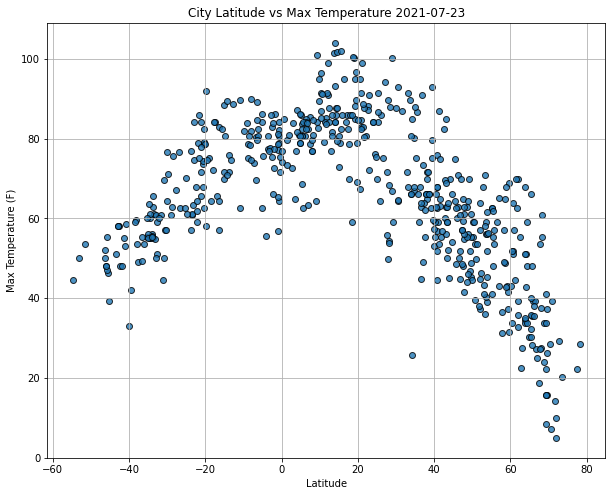

In [15]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("latitude_vs_temperature.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

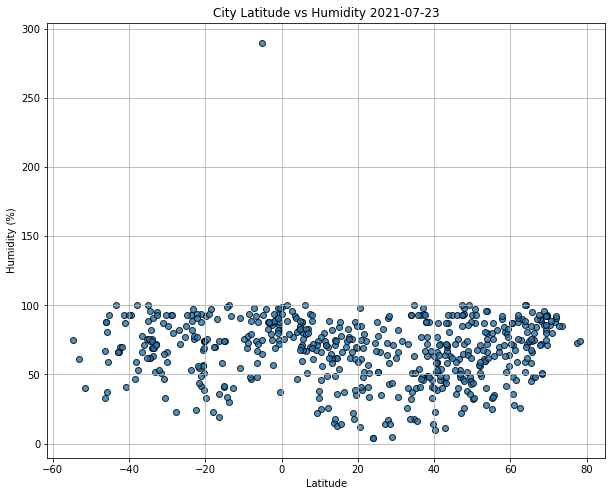

In [16]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

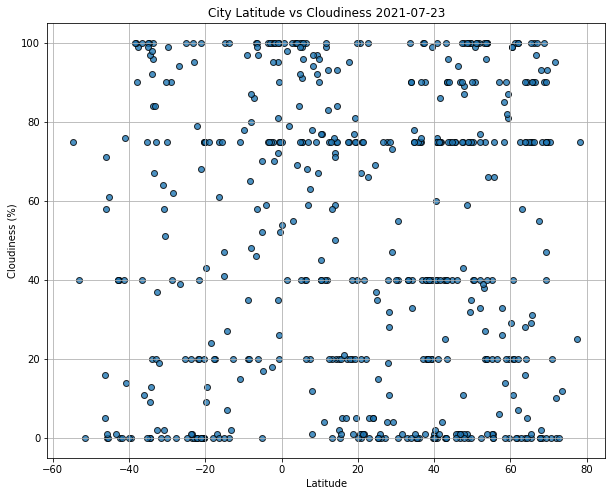

In [17]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

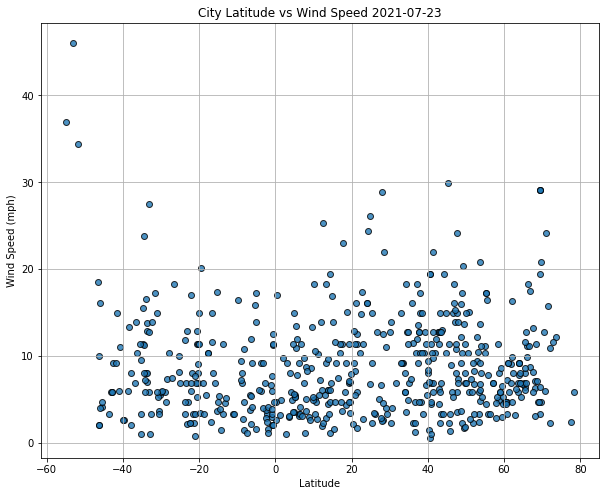

In [18]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [19]:
#Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: 0.6644951847801386
The correlation between both factors is -0.82


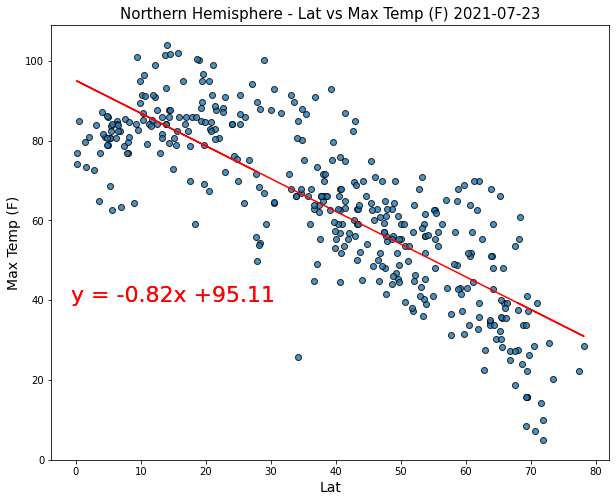

In [22]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-value is: 0.46937863826630627


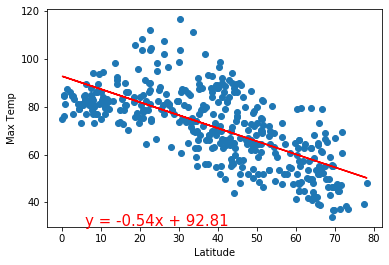

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.047879684291709905
The correlation between both factors is 0.22


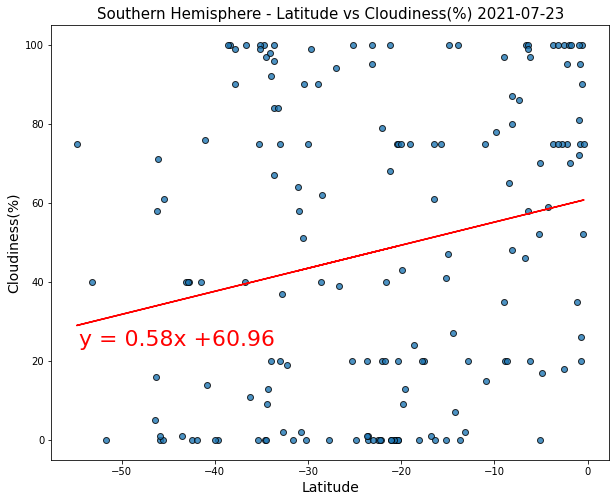

In [23]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-value is: 0.6082708688906918


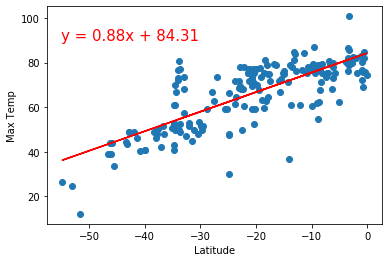

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010729512501511098
The correlation between both factors is 0.1


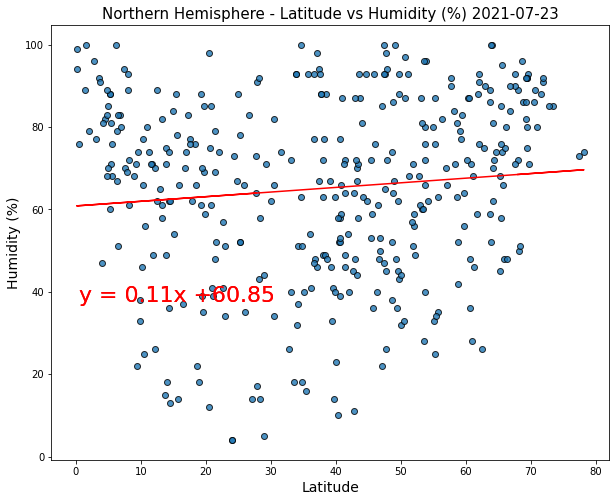

In [24]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The r-value is: 0.000543987878808455


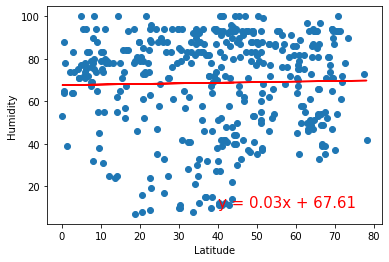

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010729512501511098
The correlation between both factors is 0.1


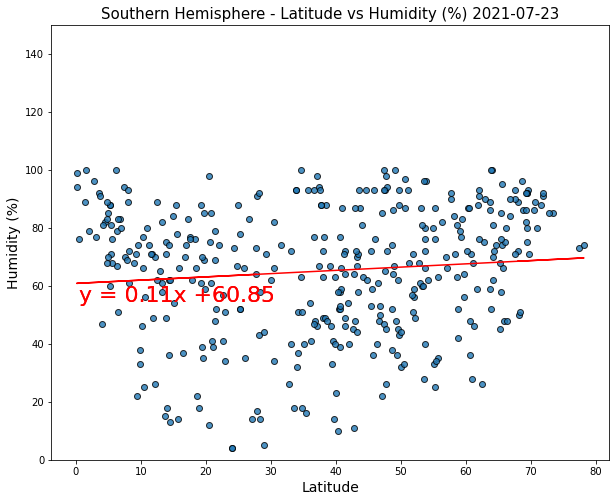

In [25]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

The r-value is: 0.014985174297345524


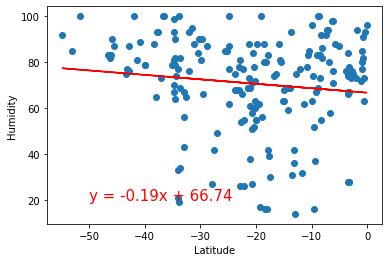

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007627485925231671
The correlation between both factors is -0.09


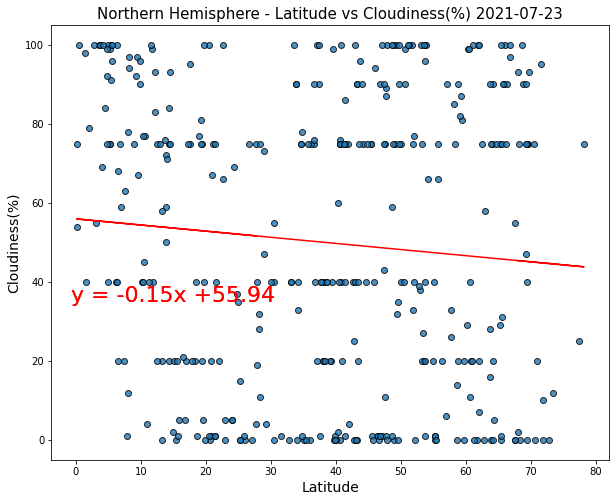

In [26]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The r-value is: 0.0020898727664228514


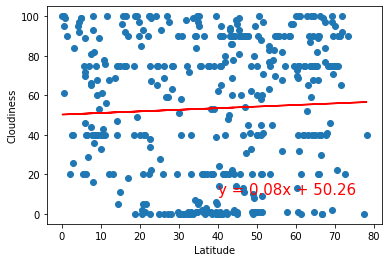

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047879684291709905
The correlation between both factors is 0.22


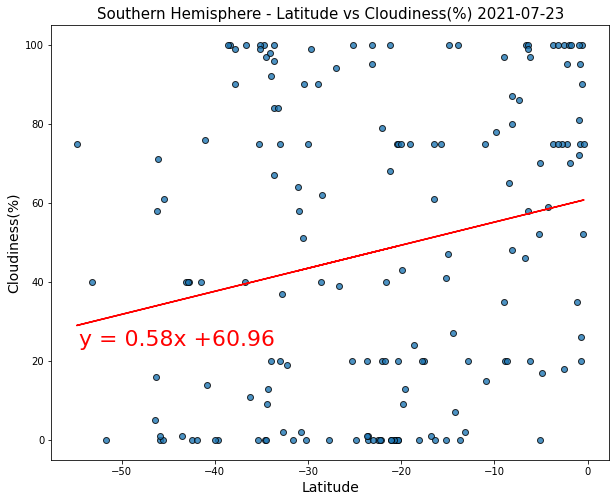

In [27]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

The r-value is: 0.0035263772085582894


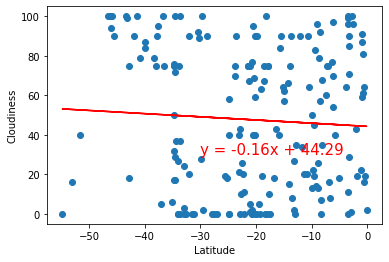

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011478610492563561
The correlation between both factors is 0.11


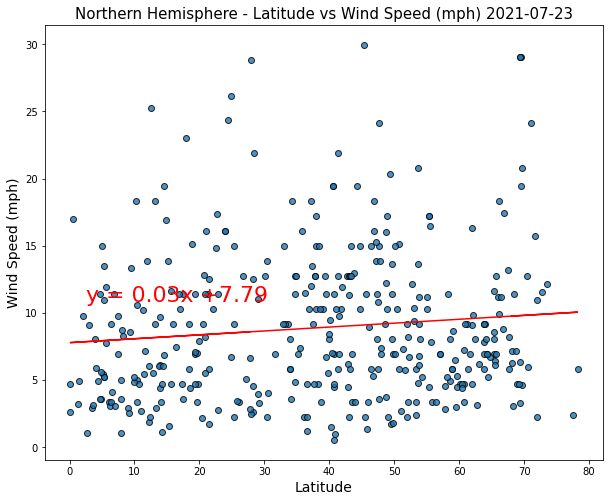

In [28]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

The r-value is: 0.04019723576144484


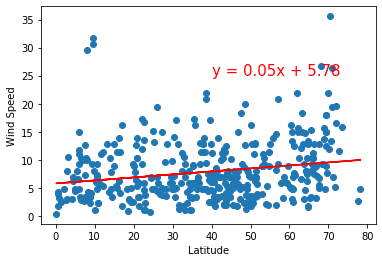

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10399533504138529
The correlation between both factors is -0.32


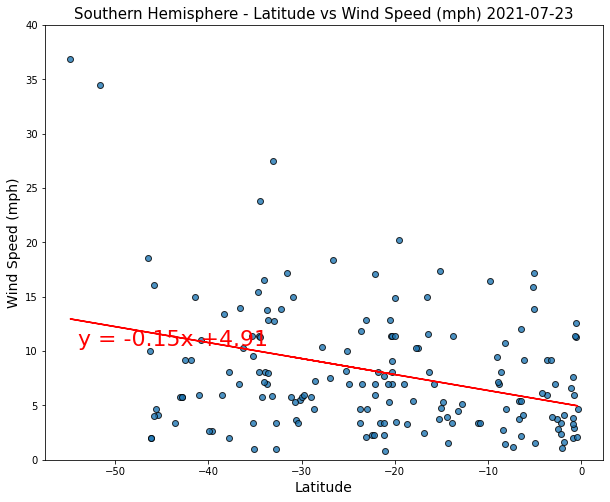

In [29]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("C:/Users/Sajedeh/personal-class/Python-API-Challenge/output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

The r-value is: 0.017128274759839232


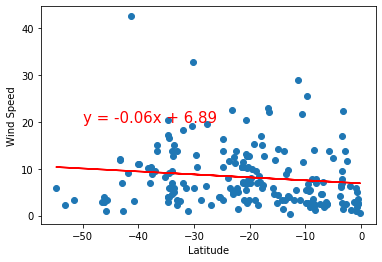